In [ ]:
##Lab1. Experimental time complexity analysis
## Chernov Igor j4234c

In [1]:
import numpy as np
import numpy.random as rand
import decimal
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#constant function
def const_function(v):
    return 1

In [4]:
#the sum of elements
def sum_function(v):
    sum = 0
    for i in range(0, len(v)):
        sum += v[i]
    return sum

In [5]:
#the product of elements
def prod_function(v):
    decimal.getcontext().prec = 100 #to avoid overflow
    prod = 1
    for i in range(0, len(v)):
        prod *= decimal.Decimal(v[i])
    return prod

In [7]:
#direct calculation P(x)
def poly_direct_function(v, x):
    decimal.getcontext().prec = 100 #to avoid overflow
    res = 0
    for i in range(len(v)):
        res += decimal.Decimal(v[i]) * (decimal.Decimal(x) ** i)
    return res

In [8]:
#Horner's calculation P(x)
def poly_horner_function(v, x):
    res = v[len(v)-1]
    for i in range(len(v)-2, -1, -1):
        res = decimal.Decimal(res) * decimal.Decimal(x) + decimal.Decimal(v[i])
    return res

In [9]:
#Bubble sort
def bubble_sort_function(v):
    for i in range(len(v)):
        for j in range(0, len(v)-i-1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
    return v

In [10]:
#Quick sort 

def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot

def quick_sort_function(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    
    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, begin, end)

In [11]:
#Timsort

minrun = 32
def InsSort(v,start,end):    
    for i in range(start+1,end+1):
        elem = v[i]
        j = i-1
        while j>=start and elem<v[j]:
            v[j+1] = v[j]
            j -= 1
        v[j+1] = elem
    return v
def merge(v,start,mid,end):
    if mid==end:
        return v
    first = v[start:mid+1]
    last = v[mid+1:end+1]
    len1 = mid-start+1
    len2 = end-mid
    ind1 = 0
    ind2 = 0
    ind  = start
     
    while ind1<len1 and ind2<len2:
        if first[ind1]<last[ind2]:
            v[ind] = first[ind1]
            ind1 += 1
        else:
            v[ind] = last[ind2]
            ind2 += 1
        ind += 1
     
    while ind1<len1:
        v[ind] = first[ind1]
        ind1 += 1
        ind += 1
              
    while ind2<len2:
        v[ind] = last[ind2]
        ind2 += 1
        ind += 1   
              
    return v
            
def timsort_func(v):
    n = len(v)
    
    for start in range(0,n,minrun):
        end = min(start+minrun-1,n-1)
        v = InsSort(v,start,end)
        
    curr_size = minrun
    while curr_size<n:    
        for start in range(0,n,curr_size*2):
            mid = min(n-1,start+curr_size-1)
            end = min(n-1,mid+curr_size)
            v = merge(v,start,mid,end)
        curr_size *= 2
    return v

In [12]:
# matrix product

def matrix_prod_function(A, B):
    return np.matmul(A, B)  

In [13]:
# function for data representation 

def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [14]:
#const function estimation
def const_function_est(x, a):
    return np.ones_like(x) * a

In [15]:
# linear function estimation
def linear_function_est(x, a):
    return x * a

In [16]:
# loglinear function estimation
def loglinear_function_est(x, a):
    return a * x * np.log(x)

In [17]:
# n^2 function estimation
def quadratic_function_est(x, a):
    return a * x ** 2

In [18]:
# n^3 function estimation
def cube_function_est(x, a):
    return a * x ** 3

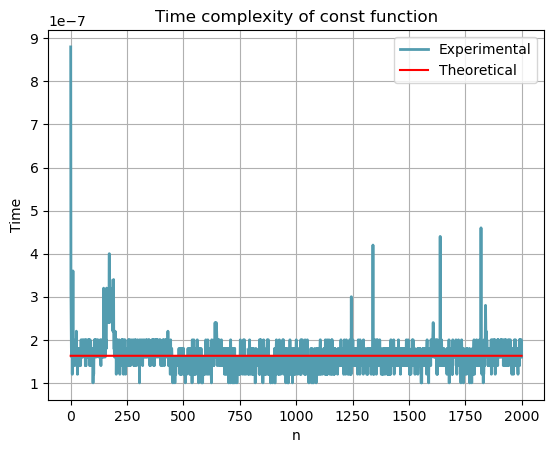

In [19]:
# Time complexity estimation for constant function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        const_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))

x_data = [n for n in range(2000)]

popt, cov = curve_fit(const_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', 'Time complexity of const function')

plt.plot(x_data, const_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

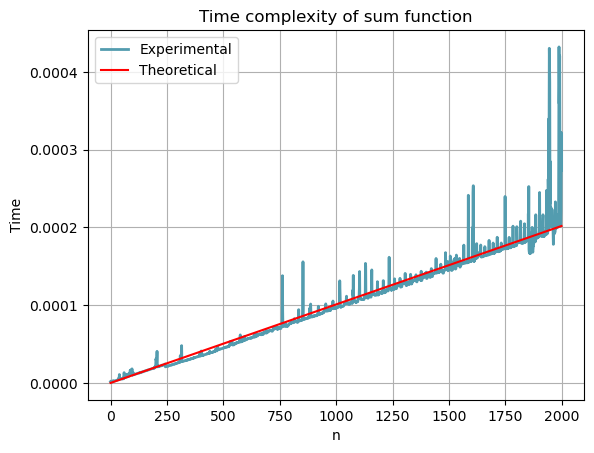

In [20]:
# Time complexity estimation for sum function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        sum_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.arange(len(avg_times), dtype=np.float64)
    
popt, cov = curve_fit(linear_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', 'Time complexity of sum function')

plt.plot(x_data, linear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

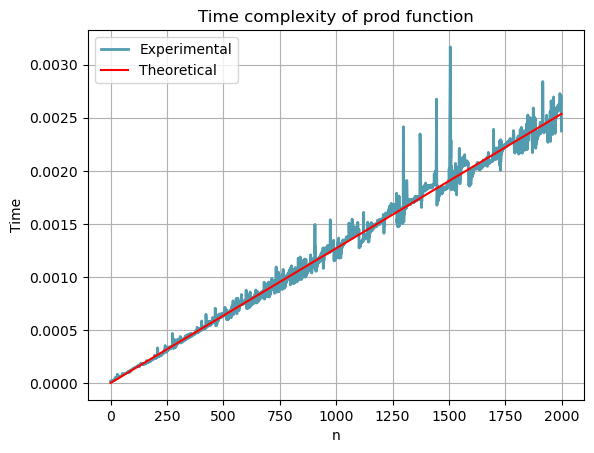

In [21]:
# Time complexity estimation for product function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        prod_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.arange(len(avg_times), dtype=np.float64)

popt, cov = curve_fit(linear_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', 'Time complexity of prod function')

plt.plot(x_data, linear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

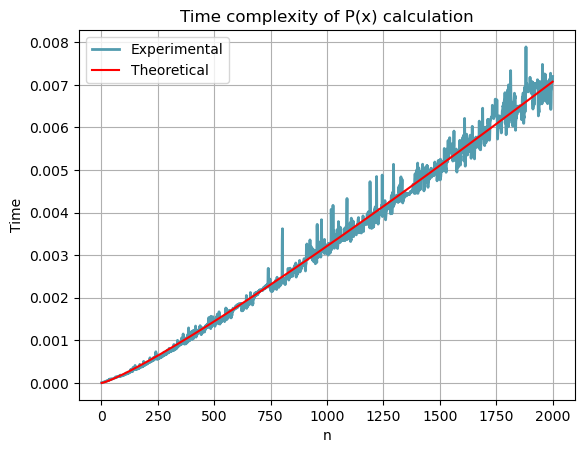

In [22]:
# Time complexity estimation for direct P(x) calculation
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        poly_direct_function(vector, x=1.5)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
 
x_data = np.linspace(1, len(avg_times), len(avg_times)-1, dtype=np.float64)
    
popt, cov = curve_fit(loglinear_function_est, x_data, avg_times[1:])

lineplot(x_data, avg_times[1:], 'n', 'Time', 'Time complexity of P(x) calculation')

plt.plot(x_data, loglinear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

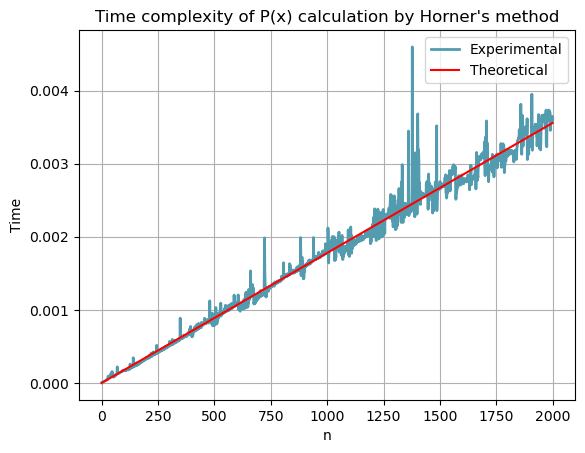

In [23]:
# Time complexity estimation for P(x) calculation by Horner's method
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        poly_horner_function(vector, x=1.5)
        
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.arange(len(avg_times), dtype=np.float64)

popt, cov = curve_fit(linear_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', "Time complexity of P(x) calculation by Horner's method")

plt.plot(x_data, linear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

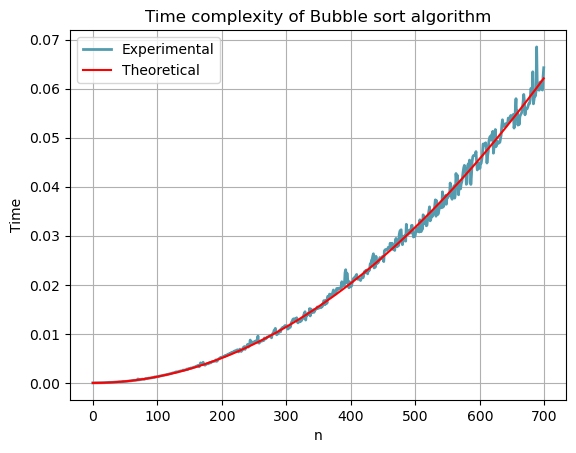

In [24]:
# Time complexity estimation of Bubble sort algorithm
avg_times = []
for n in range(1, 701):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        bubble_sort_function(vector)
        
        # end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.arange(len(avg_times), dtype=np.float64)

popt, cov = curve_fit(quadratic_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', 'Time complexity of Bubble sort algorithm')

plt.plot(x_data, quadratic_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

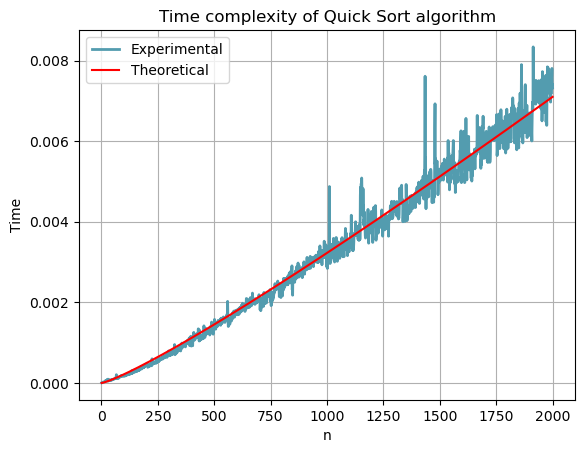

In [25]:
# Time complexity estimation of Quick sort algorithm
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        quick_sort_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.linspace(1, len(avg_times), len(avg_times)-1, dtype=np.float64)
    
popt, cov = curve_fit(loglinear_function_est, x_data, avg_times[1:])

lineplot(x_data, avg_times[1:], 'n', 'Time', 'Time complexity of Quick Sort algorithm')

plt.plot(x_data, loglinear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

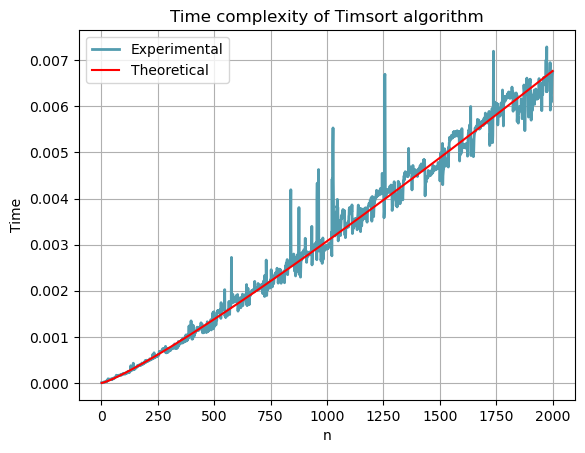

In [26]:
# Time complexity estimation of Timsort algorithm

avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        timsort_func(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
        
    avg_times.append(np.mean(t))
    
x_data = np.linspace(1, len(avg_times), len(avg_times)-1, dtype=np.float64)
    
popt, cov = curve_fit(loglinear_function_est, x_data, avg_times[1:])

lineplot(x_data, avg_times[1:], 'n', 'Time', 'Time complexity of Timsort algorithm')

plt.plot(x_data, loglinear_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()

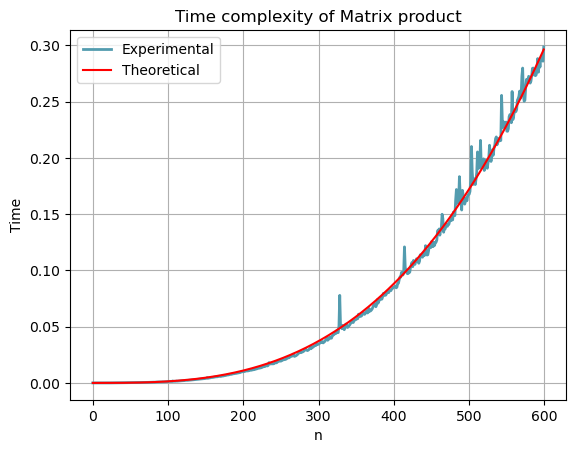

In [27]:
# Matrix product

n = 600

# matrix generation
avg_times = []
for n in range(1, n+1):
    t = []
    for i in range(5):
        # matrix generation
        A_matrix = np.random.randint(100, size=(n, n))
        B_matrix = np.random.randint(100, size=(n, n))
        
        # start time
        start_t = time.perf_counter()
        
        matrix_prod_function(A_matrix, B_matrix)
        
        # end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
x_data = np.arange(len(avg_times), dtype=np.float64)

popt, cov = curve_fit(cube_function_est, x_data, avg_times)

lineplot(x_data, avg_times, 'n', 'Time', 'Time complexity of Matrix product')

plt.plot(x_data, cube_function_est(x_data, *popt), 'r-')
plt.legend(["Experimental", "Theoretical"])
plt.show()